# Importing Libraries

Regular Expression and Panda


In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Reading File

Reading the Wipro Evaluation chat file

In [2]:
f = open('/kaggle/input/whatsapp-group-chats/whatsappexmp.txt','r',encoding='utf-8')
data = f.read()

In [3]:
print(type(data))

<class 'str'>


In [4]:
print(data)

30/11/22, 11:43 am - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
22/11/22, 3:09 pm - ~ Jugesh created group "Skc STUDY group"
30/11/22, 9:58 am - ~ Jugesh added +91 6394 703 305
30/11/22, 5:57 pm - ~ Mahi added +91 88579 59621
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm - Gulnaz: <Media omitted>
30/11/22, 6:19 pm

In [5]:
# pattern = r'(\d{2}/\d{2}/\d{2}), (\d{1,2}:\d{2} [ap]m) - \+([\d\s()+-]+):(.+)'
# Creating a regular expression which will help in extracting data

pattern = '\d{2}/\d{2}/\d{2,4},\s\d{1,2}:\d{2}\s[ap]m\s-\s'

In [6]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '~\u202fJugesh created group "Skc STUDY group"\n',
 '~\u202fJugesh added +91 6394 703 305\n',
 '~\u202fMahi added +91 88579 59621\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',
 'Gulnaz: <Media omitted>\n',

In [7]:
dates = re.findall(pattern, data)

# Remove \u202f character
dates = [date.replace('\u202f', ' ') for date in dates]

dates

['30/11/22, 11:43 am - ',
 '22/11/22, 3:09 pm - ',
 '30/11/22, 9:58 am - ',
 '30/11/22, 5:57 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:19 pm - ',
 '30/11/22, 6:20 pm - ',
 '30/11/22, 6:20 pm - ',
 '30/11/22, 6:20 pm - ',
 '30/11/22, 6:20 pm - ',
 '30/11/22, 6:20 pm - ',
 '30/11/22, 6:20 pm - ',
 '30/11/22, 6:20 pm - ',
 '30/11/22, 6:21 pm - ',

## Panda Dataframe

Creating Panda dataframe for messages and dates

In [8]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})

# Convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %I:%M %p - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-11-30 11:43:00
1,"~ Jugesh created group ""Skc STUDY group""\n",2022-11-22 15:09:00
2,~ Jugesh added +91 6394 703 305\n,2022-11-30 09:58:00
3,~ Mahi added +91 88579 59621\n,2022-11-30 17:57:00
4,Gulnaz: <Media omitted>\n,2022-11-30 18:19:00


In [9]:
users = []
messages = []
for message in df['user_message']:
  entry = re.split('([\w\W]+?):\s', message)
  if entry[1:]:
    users.append(entry[1])
    messages.append(entry[2])
  else:
    users.append('group_notification')
    messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df

,date,user,message
0,2022-11-30 11:43:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-11-22 15:09:00,group_notification,"~ Jugesh created group ""Skc STUDY group""\n"
2,2022-11-30 09:58:00,group_notification,~ Jugesh added +91 6394 703 305\n
3,2022-11-30 17:57:00,group_notification,~ Mahi added +91 88579 59621\n
4,2022-11-30 18:19:00,Gulnaz,<Media omitted>\n
...,...,...,...
8213,2023-03-10 22:55:00,Harshad Clg,Aisa kya kr raha hai tu\n
8214,2023-03-10 22:55:00,+91 80106 10466,Samjh jaaa 😁\n
8215,2023-03-10 22:56:00,Harshad Clg,Okay baba\n
8216,2023-03-10 22:56:00,Harshad Clg,Tu BI KHA questions bhej pheley\n


In [10]:
# See the number of messages

df.shape

(8218, 3)

In [11]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-11-30 11:43:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,November,30,11,43
1,2022-11-22 15:09:00,group_notification,"~ Jugesh created group ""Skc STUDY group""\n",2022,November,22,15,9
2,2022-11-30 09:58:00,group_notification,~ Jugesh added +91 6394 703 305\n,2022,November,30,9,58
3,2022-11-30 17:57:00,group_notification,~ Mahi added +91 88579 59621\n,2022,November,30,17,57
4,2022-11-30 18:19:00,Gulnaz,<Media omitted>\n,2022,November,30,18,19


# Splitting the word

In [12]:
words = []
for message in df['message']:
  words.extend(message.split())
len(words)

50139

In [13]:
df[df['message'] == '<Media omitted>\n']

,date,user,message,year,month,day,hour,minute
4,2022-11-30 18:19:00,Gulnaz,<Media omitted>\n,2022,November,30,18,19
5,2022-11-30 18:19:00,Gulnaz,<Media omitted>\n,2022,November,30,18,19
6,2022-11-30 18:19:00,Gulnaz,<Media omitted>\n,2022,November,30,18,19
7,2022-11-30 18:19:00,Gulnaz,<Media omitted>\n,2022,November,30,18,19
8,2022-11-30 18:19:00,Gulnaz,<Media omitted>\n,2022,November,30,18,19
...,...,...,...,...,...,...,...,...
8183,2023-02-13 15:45:00,Ankit Pandey Clg,<Media omitted>\n,2023,February,13,15,45
8184,2023-02-13 15:46:00,Ankit Pandey Clg,<Media omitted>\n,2023,February,13,15,46
8185,2023-02-13 17:33:00,Sagar Clg,<Media omitted>\n,2023,February,13,17,33
8187,2023-02-13 19:12:00,Ankit Pandey Clg,<Media omitted>\n,2023,February,13,19,12


In [14]:
no_of_media = df[df['message'] == '<Media omitted>\n'].shape[0]
print(no_of_media)

1215


In [15]:
def count_media(df):
    no_of_media = 0
    for i in range(len(df)):
        if df.loc[i, 'message'] == '<Media omitted>\n':
            no_of_media += 1
    return no_of_media

no_of_media = count_media(df.copy())
print(no_of_media)

1215


# Extractin Links from Chat

In [16]:
!pip install urlextract --quiet

In [17]:
from urlextract import URLExtract
extractor = URLExtract()

In [18]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [19]:
len(links)

142

# Top on the chats
**Finding the top 5 users**

In [20]:
x = df['user'].value_counts().head()
# x.reset_index().rename(columns={'index': 'user', 0: 'count'})

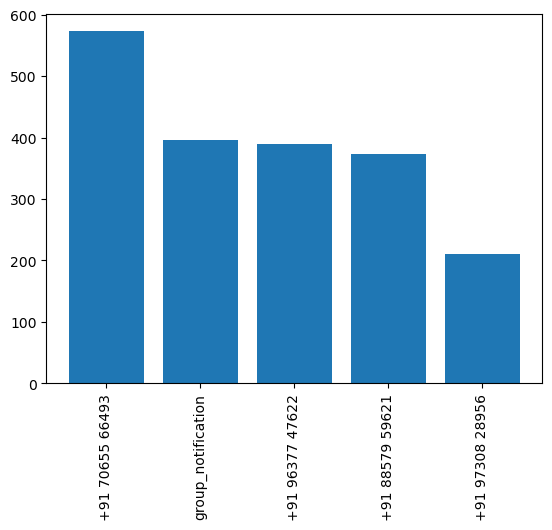

In [21]:
name = x.index
count = x.values
plt.bar(name, count)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
percent = (df['user'].value_counts()/df.shape[0])*100
round(percent,2).reset_index().rename(columns={'index':'user','user':'percent'})

,user,percent
0,+91 70655 66493,6.97
1,group_notification,4.82
2,+91 96377 47622,4.75
3,+91 88579 59621,4.55
4,+91 97308 28956,2.57
...,...,...
297,+91 75259 14664,0.01
298,+91 78881 31695,0.01
299,+91 93703 81905,0.01
300,+91 72195 28969,0.01
